In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
def load_data(dataset_path):
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp')  # Common image formats
    categories = os.listdir(dataset_path)
    images, labels = [], []

    for label, category in enumerate(categories):
        category_path = os.path.join(dataset_path, category)
        if os.path.isdir(category_path):  # Ensure it's a folder
            for file in os.listdir(category_path):
                img_path = os.path.join(category_path, file)
                try:
                    # Process only valid image files
                    if file.lower().endswith(valid_extensions):
                        img = plt.imread(img_path)
                        if img.shape[-1] == 3:  # Check for RGB images
                            images.append(img)
                            labels.append(label)
                except Exception as e:
                    print(f"Error reading file {img_path}: {e}")

    return np.array(images), np.array(labels), categories

In [3]:
dataset_path = "C:/Users/chet0/Downloads/archive (4)/PlantVillage"

In [4]:
images, labels, class_names = load_data(dataset_path)

In [5]:
print(f"Loaded {len(images)} images across {len(class_names)} categories.")

Loaded 20637 images across 16 categories.


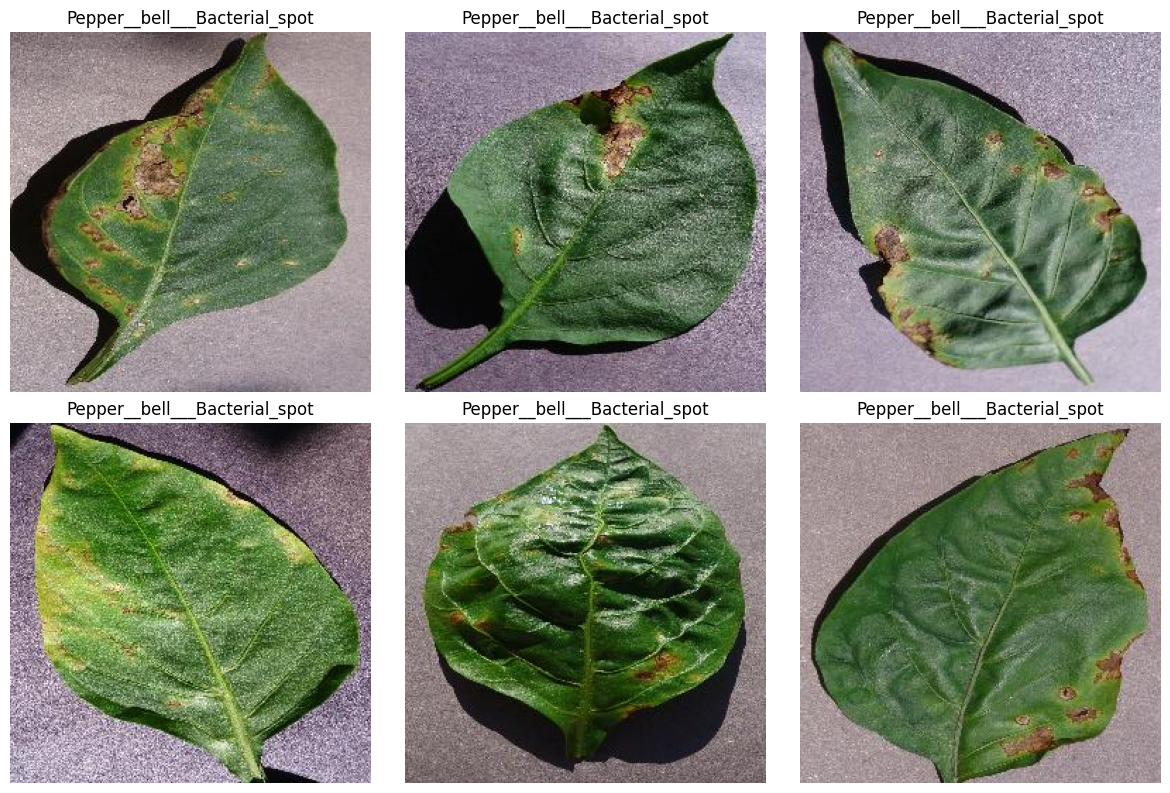

In [6]:
# Display sample images
def plot_sample_images(images, labels, class_names):
    plt.figure(figsize=(12, 8))
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_sample_images(images, labels, class_names)

In [7]:
# Step 2: Data Preprocessing
# Normalize the images and resize to a fixed size
IMG_SIZE = 128
images_resized = np.array([np.resize(img, (IMG_SIZE, IMG_SIZE, 3)) for img in images])
images_normalized = images_resized / 255.0

In [8]:
# Split into training, validation, and testing datasets
X_train, X_temp, y_train, y_temp = train_test_split(images_normalized, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Training set: (14445, 128, 128, 3), Validation set: (3096, 128, 128, 3), Test set: (3096, 128, 128, 3)


In [9]:
# Step 3: Data Augmentation
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)
data_gen.fit(X_train)

In [10]:
# Step 4: Define the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')  # Number of classes
])

C:\Users\chet0\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           2,064 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,306,704 (12.61 MB)

 Trainable params: 3,306,704 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Step 5: Train the Model
history = model.fit(
    data_gen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    ]
)

C:\Users\chet0\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 150s 325ms/step - accuracy: 0.1989 - loss: 2.4619 - val_accuracy: 0.3999 - val_loss: 1.8499
Epoch 2/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 138s 305ms/step - accuracy: 0.3859 - loss: 1.9090 - val_accuracy: 0.4189 - val_loss: 1.8070
Epoch 3/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 137s 303ms/step - accuracy: 0.4523 - loss: 1.6632 - val_accuracy: 0.4787 - val_loss: 1.6551
Epoch 4/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 287s 635ms/step - accuracy: 0.4937 - loss: 1.5520 - val_accuracy: 0.5113 - val_loss: 1.5383
Epoch 5/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 426s 943ms/step - accuracy: 0.5253 - loss: 1.4568 - val_accuracy: 0.4961 - val_loss: 1.5896
Epoch 6/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 423s 936ms/step - accuracy: 0.5398 - loss: 1.4063 - val_accuracy: 0.5307 - val_loss: 1.4615
Epoch 7/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 426s 941ms/step - accuracy: 0.5589 - loss: 1.3295 - val_accuracy: 0.5746 - val_loss: 1.3376
Epoch 8/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 423s 936ms/step - accuracy: 0.5805 -

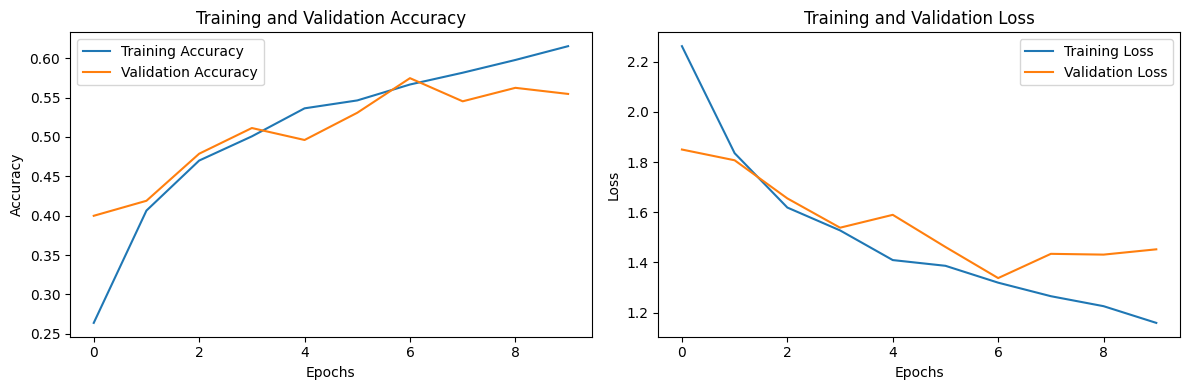

In [14]:
# Step 6: Evaluate the Model
# Plot training and validation accuracy/loss
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [15]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 207ms/step - accuracy: 0.5755 - loss: 1.3279
Test Accuracy: 0.57


In [17]:
from sklearn.metrics import classification_report
import numpy as np

# Predict on test data
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Ensure alignment of class names with y_test
unique_classes = np.unique(y_test)  # Get unique class labels in y_test
filtered_class_names = [class_names[i] for i in unique_classes]  # Filter class names for unique labels in y_test

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=filtered_class_names))

97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 205ms/step
Classification Report:
                                              precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.23      0.48      0.31       127
                     Pepper__bell___healthy       0.35      0.95      0.52       226
                      Potato___Early_blight       0.59      0.78      0.68       133
                           Potato___healthy       0.00      0.00      0.00        34
                       Potato___Late_blight       0.79      0.12      0.21       158
                      Tomato_Bacterial_spot       0.82      0.67      0.74       331
                        Tomato_Early_blight       0.34      0.50      0.41       150
                             Tomato_healthy       0.83      0.88      0.85       246
                         Tomato_Late_blight       0.60      0.48      0.53       301
                           Tomato_Leaf_Mold       0.90      0.34      0.49       13

C:\Users\chet0\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chet0\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chet0\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

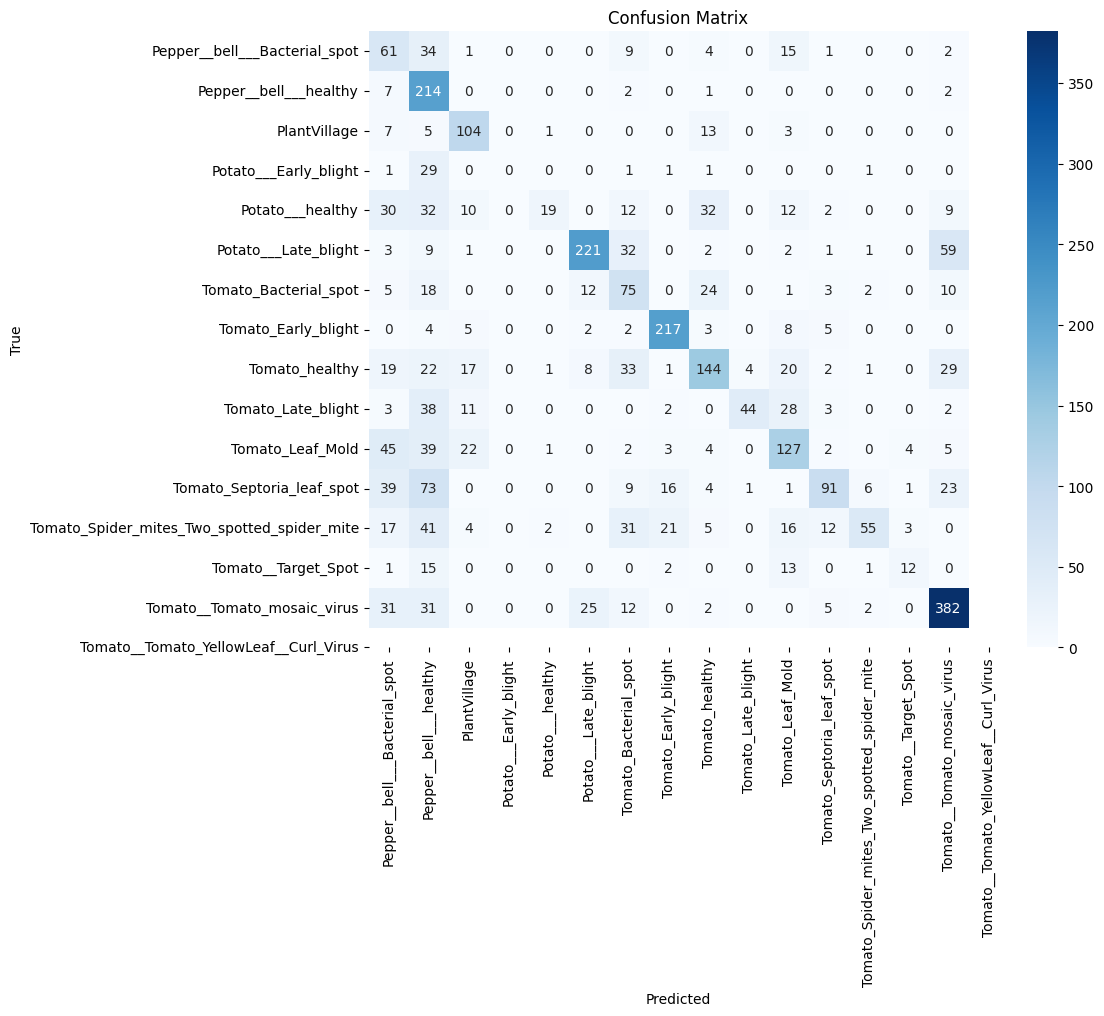

In [18]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
